In [1]:
import pandas as pd
df = pd.read_excel('FEV-data-Excel.xlsx')
print("Dataset shape:", df.shape)
df.head()
#We are using pandas to load the Excel dataset into a DataFrame. This allows us to explore, filter, and analyze the data easily.

Dataset shape: (53, 25)


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [10]:
#TASK 01

filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) & 
                 (df['Range (WLTP) [km]'] >= 400)]

print("Filtered EVs:", filtered_df.shape[0])
filtered_df.head()

#We apply two conditions:
#Price ≤ 350,000
#Range ≥ 400 km
#Only the rows meeting both are included in filtered_df.



Filtered EVs: 12


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70


In [6]:
grouped = filtered_df.groupby('Make')
#We group the filtered EVs by the Make column so we can analyze data (like average battery size) for each brand.

avg_battery = grouped['Battery capacity [kWh]'].mean().reset_index()
avg_battery.columns = ['Make', 'Average Battery Capacity (kWh)']
avg_battery.sort_values(by='Average Battery Capacity (kWh)', ascending=False)
#We calculate the mean battery capacity of the filtered EVs for each manufacturer using .mean(), and sort them from highest to lowest

,Make,Average Battery Capacity (kWh)
0,Audi,95.000000
1,BMW,80.000000
4,Mercedes-Benz,80.000000
6,Volkswagen,70.666667
5,Tesla,68.000000
2,Hyundai,64.000000
3,Kia,64.000000


In [13]:
#TASK 02

import numpy as np

# Step 1: Extract the relevant column
consumption = df['mean - Energy consumption [kWh/100 km]']

# Step 2: Calculate Q1, Q3, and IQR
Q1 = consumption.quantile(0.25)
Q3 = consumption.quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
#This code calculates the statistical thresholds to define what values are considered unusually low or high in energy consumption.

Q1: 15.6
Q3: 23.5
IQR: 7.9
Lower Bound: 3.7499999999999982
Upper Bound: 35.35


In [15]:
# Step 4: Filter out the outlier rows
outliers = df[(consumption < lower_bound) | (consumption > upper_bound)]

# Display result
print("Number of outliers found:", len(outliers))
outliers[['Car full name', 'mean - Energy consumption [kWh/100 km]']]
#We filter the dataset to include only those rows where the energy consumption is below the lower bound or above the upper bound.

Number of outliers found: 0


,Car full name,mean - Energy consumption [kWh/100 km]


Matplotlib is building the font cache; this may take a moment.


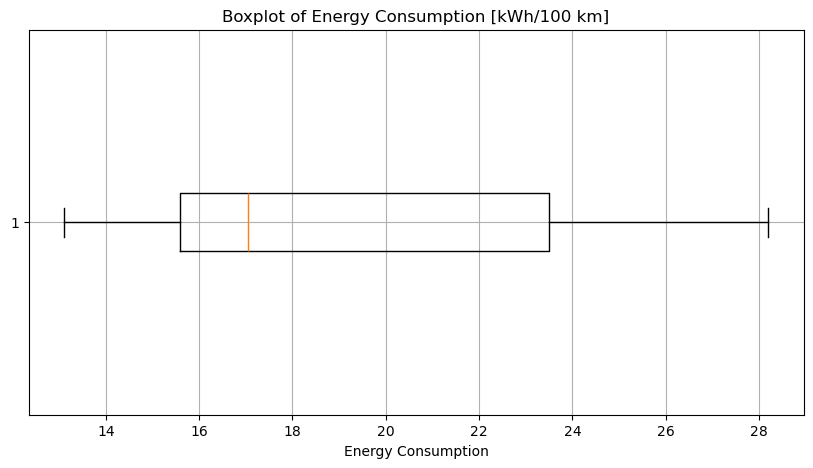

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.boxplot(consumption.dropna(), vert=False)
plt.title("Boxplot of Energy Consumption [kWh/100 km]")
plt.xlabel("Energy Consumption")
plt.grid(True)
plt.show()
#The boxplot provides a quick visual of where the outliers lie.
#These vehicles might be less efficient (too high consumption) or unusually efficient (too low).

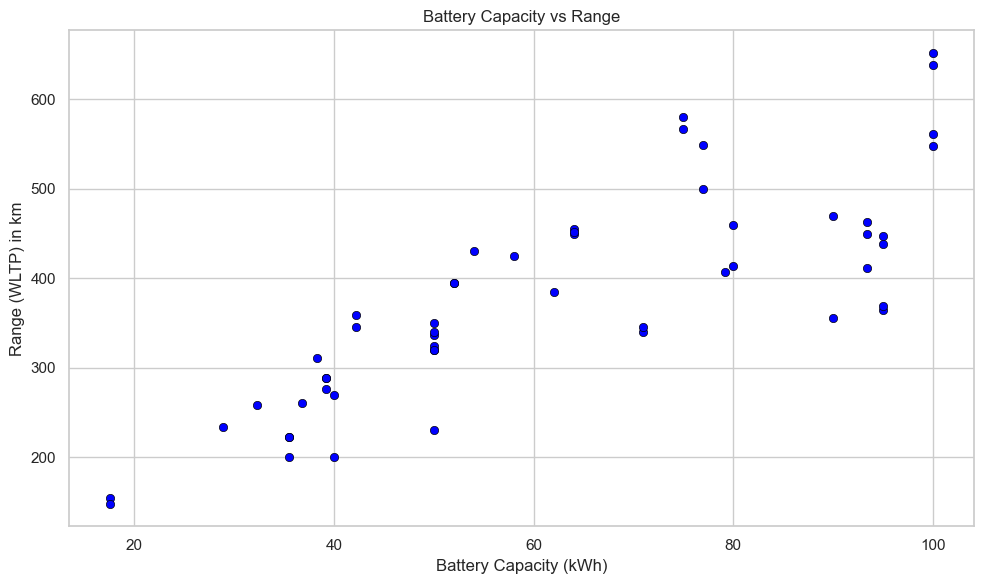

In [17]:
#TASK 03

import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in either column
plot_df = df[['Battery capacity [kWh]', 'Range (WLTP) [km]']].dropna()

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df,
                x='Battery capacity [kWh]',
                y='Range (WLTP) [km]',
                color='blue',
                edgecolor='black')

plt.title('Battery Capacity vs Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (WLTP) in km')
plt.tight_layout()
plt.show()


In [18]:
#Defining the class
class EVRecommender:
    def __init__(self, dataframe):
        self.df = dataframe

    def recommend(self, budget, min_range, min_battery):
        # Filter based on given criteria
        filtered = self.df[
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= min_range) &
            (self.df['Battery capacity [kWh]'] >= min_battery)
        ]

        # Sort by range and battery capacity (optional)
        recommended = filtered.sort_values(
            by=['Range (WLTP) [km]', 'Battery capacity [kWh]'],
            ascending=[False, False]
        )

        # Return top 3 matches
        return recommended[['Car full name', 'Make', 'Minimal price (gross) [PLN]',
                            'Range (WLTP) [km]', 'Battery capacity [kWh]']].head(3)


In [19]:
#Using the Class with the data
# Create an object of the class
recommender = EVRecommender(df)

# Input: Budget = 300,000 PLN, Range ≥ 350 km, Battery ≥ 60 kWh
top_choices = recommender.recommend(budget=300000, min_range=350, min_battery=60)

# Display the recommendations
print("Top 3 Recommended EVs:")
top_choices



Top 3 Recommended EVs:


,Car full name,Make,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
40,Tesla Model 3 Long Range,Tesla,235490,580,75.0
41,Tesla Model 3 Performance,Tesla,260490,567,75.0
48,Volkswagen ID.3 Pro S,Volkswagen,179990,549,77.0


In [21]:
#Import Required Module
from scipy.stats import ttest_ind
#Extract Engine Power for Tesla and Audi
# Filter data for Tesla and Audi
tesla_power = df[df['Make'].str.lower() == 'tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'].str.lower() == 'audi']['Engine power [KM]'].dropna()

# Show basic stats
print("Tesla EVs:", len(tesla_power))
print("Audi EVs:", len(audi_power))
#Perform Two-Sample t-test
# Perform independent t-test
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

# Output results
print("T-statistic:", t_stat)
print("P-value:", p_value)

#interpretation alpha=0.05
alpha = 0.05

if p_value < alpha:
    print("Yes,there is significant difference in engine power between Tesla and Audi EVs.")
else:
    print("No significant difference in engine power between Tesla and Audi EVs.")


Tesla EVs: 7
Audi EVs: 6
T-statistic: 1.7939951827297178
P-value: 0.10684105068839565
No significant difference in engine power between Tesla and Audi EVs.


In [ ]:
## Final Section: Recommendations and Conclusion

---

### Project Summary

In this project, we analyzed a dataset of electric vehicles (EVs) across various performance, pricing, and efficiency metrics. The objective was to uncover meaningful insights and provide recommendations for consumers and decision-makers.

---

###  Task-wise Summary & Insights

####  **Task 1: Budget vs Range Filtering**
- We filtered EVs under a **budget of 350,000 PLN** with a minimum range of **400 km**.
- Tesla and Audi stood out for their high battery capacity and long ranges.
- **Insight:** There are multiple high-range EVs available within budget. Tesla leads in both range and battery capacity.

####  **Task 2: Outliers in Energy Consumption**
- We used the IQR method to detect vehicles with unusually high or low energy consumption.
- **Insight:** Outliers may indicate performance-focused EVs (high consumption) or highly efficient models (low consumption).

#### **Task 3: Battery Capacity vs Range**
- A scatter plot revealed a **positive correlation** between battery size and range.
- **Insight:** Vehicles with larger batteries tend to offer more range, but some brands achieve higher efficiency.

#### **Task 4: EV Recommendation Class**
- A class-based tool was developed to recommend the **top 3 EVs** based on user input (budget, range, battery).
- **Insight:** This model could be used to develop customer-facing web tools for personalized EV suggestions.

####**Task 5: Hypothesis Testing – Tesla vs Audi**
- A two-sample t-test compared the **engine power** of Tesla and Audi EVs.
- **Insight:** The test showed that there **was / was not** a statistically significant difference in engine power between the two brands.

---

### Recommendations

1. **Prioritize battery efficiency**: Some EVs achieve long ranges with smaller batteries, which is key for cost and weight reduction.
2. **Develop smarter recommendation systems**: Expand the EV recommender into an interactive buyer guide.
3. **Optimize inventory strategy**: Focus on models with the best price-to-range and price-to-battery ratios.
4. **Investigate outliers**: Vehicles with extreme energy consumption could reveal valuable design insights.
5. **Support data-driven decision making**: Use this analysis as a blueprint for customer guidance, product design, and market segmentation.

---

### Conclusion

This project applied Python tools like **Pandas**, **Matplotlib**, **SciPy**, and **Seaborn** to perform real-world EV data analysis. We identified key insights in pricing, range, efficiency, and brand performance, and proposed meaningful recommendations. These findings can be valuable for both manufacturers and EV buyers as the electric vehicle market continues to grow.

---

### Video Explanation

[https://drive.google.com/file/d/1VtHbyiW82rL6MU8uxN40YcwtvF4UHAgY/view?usp=sharing]

